# Klasifikasi Resiko Kematian Ibu

# Pendahuluan

Kesehatan ibu selama masa kehamilan adalah pilar fundamental bagi kesehatan masyarakat dan merupakan indikator penting kemajuan suatu negara. Angka kematian ibu (AKI) atau maternal mortality masih menjadi tantangan kesehatan global yang serius, sehingga penurunannya menjadi salah satu fokus utama dalam Tujuan Pembangunan Berkelanjutan (SDGs) yang dicanangkan oleh Perserikatan Bangsa-Bangsa (PBB). Deteksi dini dan pemantauan faktor risiko selama kehamilan merupakan kunci strategi untuk mencegah komplikasi yang dapat berujung fatal.

Tingkat Risiko Kesehatan Ibu adalah sebuah klasifikasi yang digunakan untuk mengestimasi potensi bahaya atau komplikasi yang mungkin dihadapi seorang wanita selama kehamilannya. Risiko ini dapat dikategorikan menjadi beberapa tingkatan, seperti risiko rendah, sedang, hingga tinggi, berdasarkan kondisi fisiologis ibu. Untuk menentukan tingkat risiko ini, sejumlah parameter vital dianalisis secara cermat. Faktor-faktor ini mencakup Usia, Tekanan Darah (Sistolik dan Diastolik), kadar Gula Darah, Suhu Tubuh, dan Denyut Jantung. Analisis terhadap atribut-atribut ini memungkinkan tenaga medis untuk memprediksi tingkat risiko secara proaktif, sehingga intervensi yang tepat dapat diberikan lebih awal untuk menjaga keselamatan ibu dan janin.

# Data Understanding


### Sumber Data

Dataset ini diambil

https://archive.ics.uci.edu/dataset/863/maternal+health+risk

Data telah dikumpulkan dari berbagai rumah sakit, klinik masyarakat, perawatan kesehatan ibu dari daerah pedesaan Bangladesh melalui sistem pemantauan risiko berbasis IoT.

### Tujuan

dataset ini digunakan untuk mengembangkan model prediktif dalam mendeteksi resiko kematian ibu yang dibedakan menjadi 3 klasifikasi resiko rendah sedang dan tinggi

### Intergrasi data

untuk mengambil data agar dapat diolah, perlu untuk menginstall package yang telah disediakan oleh UCI Dataset. Instalasi dilakukan berguna untuk menarik data yang berasal dari UCI dataset agar dapat diolah. peritah untuk mengambil data dari UCI dataset dapat di lihat ketika menekan tombol import in python pada datase yang diinginkan dan ikuti perintah tersebut agar data dapat diambil dari UCI dataset. Contoh pengambilan data dari UCI dataset dapat dilihat pada gambar dan perintah berikut:

In [176]:
pip install ucimlrepo

In [177]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
maternal_health_risk = fetch_ucirepo(id=863)

# data (as pandas dataframes)
X = maternal_health_risk.data.features
y = maternal_health_risk.data.targets
# menyimpan data
data=maternal_health_risk.data.original
# metadata
print(maternal_health_risk.metadata)

# variable information
print(maternal_health_risk.variables)


{'uci_id': 863, 'name': 'Maternal Health Risk', 'repository_url': 'https://archive.ics.uci.edu/dataset/863/maternal+health+risk', 'data_url': 'https://archive.ics.uci.edu/static/public/863/data.csv', 'abstract': 'Data has been collected from different hospitals, community clinics, maternal health cares from the rural areas of Bangladesh through the IoT based risk monitoring system.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1013, 'num_features': 6, 'feature_types': ['Real', 'Integer'], 'demographics': ['Age'], 'target_col': ['RiskLevel'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DP5D', 'creators': ['Marzia Ahmed'], 'intro_paper': {'ID': 274, 'type': 'NATIVE', 'title': 'Review and Analysis of Risk Factor of Maternal Health in Remote Area Using the Internet of Things (IoT)', 'authors':

## Eksplorasi Data

### Visualisasi Data

In [178]:
display(data) #display dataset

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


/tmp/ipython-input-179-2979071122.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RiskLevel',data=data,palette='viridis')


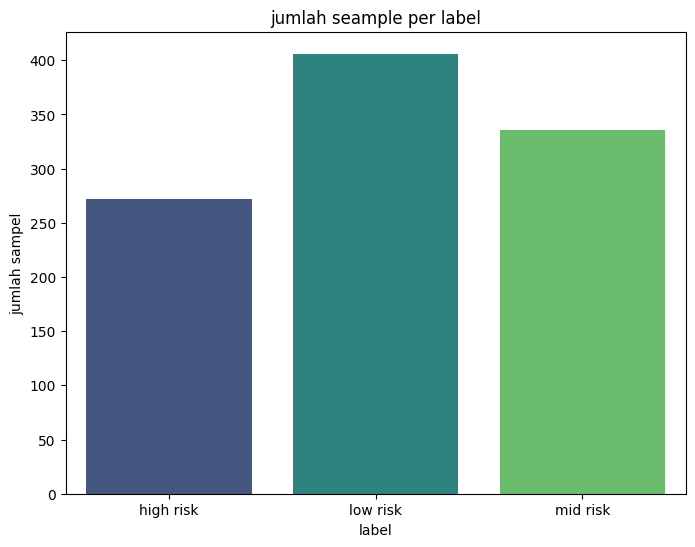

In [179]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.countplot(x='RiskLevel',data=data,palette='viridis')
plt.title('jumlah seample per label')
plt.xlabel('label')
plt.ylabel('jumlah sampel')
plt.show()

<Figure size 1200x1000 with 0 Axes>

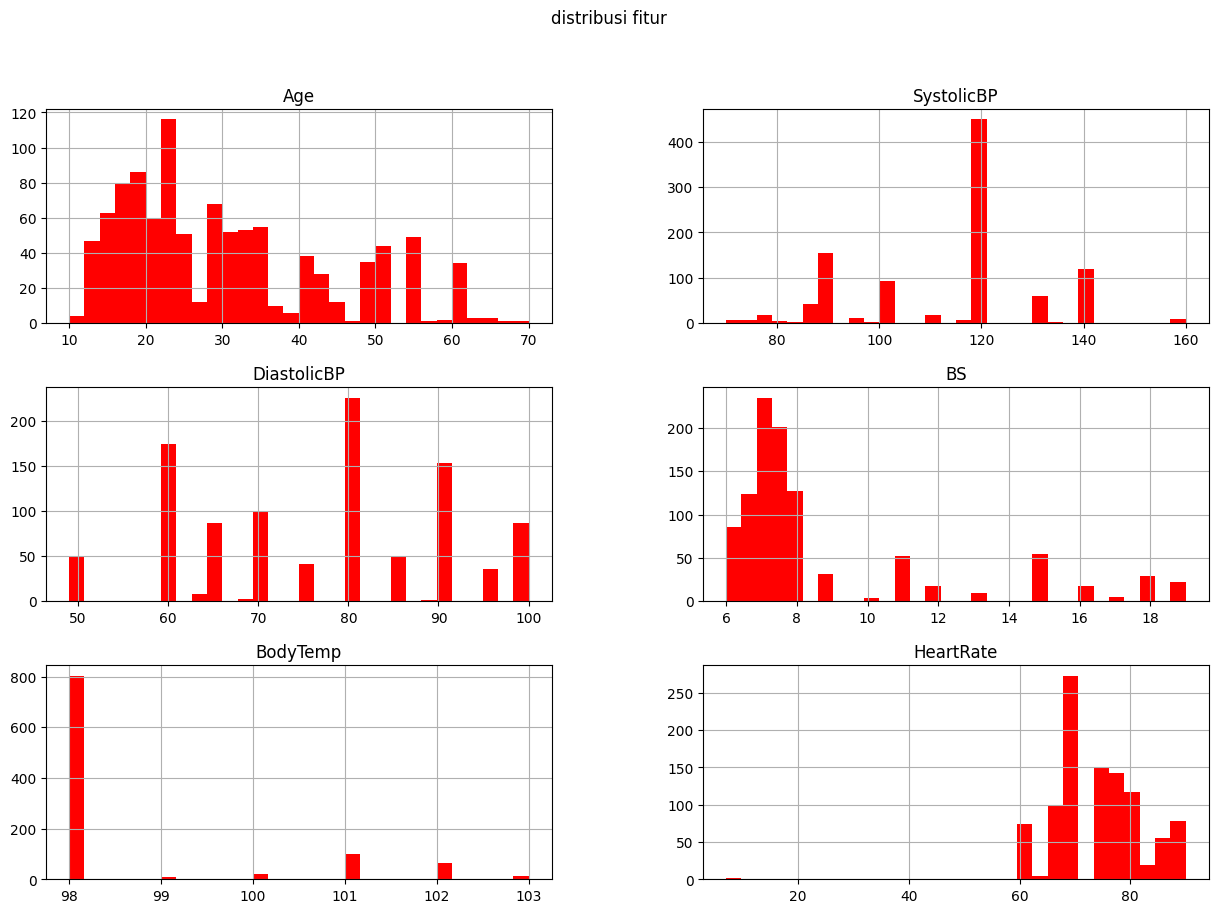

In [180]:
# Visualisasi distribusi fitur dengan histogram

plt.figure(figsize=(12,10))
data.hist(bins=30, figsize=(15,10),color='red')
plt.suptitle('distribusi fitur')
plt.show()

## Struktur dataset

Fitur dan Label

In [181]:
data.shape


(1014, 7)

terdapat 1014 baris dan 6 kolom

In [182]:
data.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

**Fitur (Features)**

Fitur adalah atribut atau variabel independen dalam dataset yang digunakan untuk membuat prediksi. Terdapat 6 fitur pada dataset ini:

Age : Berisi usia ibu dalam satuan tahun pada saat pendataan.

SystolicBP : Berisi nilai tekanan darah sistolik, yaitu tekanan puncak pada arteri saat jantung berkontraksi (berdetak). Satuannya adalah mmHg.

DiastolicBP : Berisi nilai tekanan darah diastolik, yaitu tekanan terendah pada arteri saat jantung berelaksasi (beristirahat di antara detak). Satuannya adalah mmHg.

BS : Merupakan singkatan dari Blood Sugar. Fitur ini berisi kadar glukosa darah ibu, yang merupakan indikator penting untuk kondisi seperti diabetes gestasional.

BodyTemp : Berisi data suhu tubuh ibu. Berdasarkan metadata, satuan yang digunakan adalah Fahrenheit (°F).

HeartRate : Berisi data denyut jantung istirahat ibu dalam satuan denyut per menit (beats per minute atau bpm).

Label (Target)
Label adalah variabel dependen atau target yang ingin diprediksi oleh model machine learning. Label merupakan output yang dipelajari oleh model dari data. Terdapat 1 field label dengan 3 tipe pada dataset ini:

* low risk : Menunjukkan bahwa kondisi ibu tergolong berisiko rendah terhadap komplikasi kesehatan selama kehamilan.
* mid risk : Menunjukkan bahwa kondisi ibu tergolong berisiko menengah.
* high risk : Menunjukkan bahwa kondisi ibu tergolong berisiko tinggi dan memerlukan pemantauan lebih intensif.

In [183]:
data.dtypes

,0
Age,int64
SystolicBP,int64
DiastolicBP,int64
BS,float64
BodyTemp,float64
HeartRate,int64
RiskLevel,object


Penjelasan:

Age	(numerik)
SystolicBP	(numerik)
DiastolicBP	(numerik)
BS	(numerik)
BodyTemp	(numerik)
HeartRate	(numerik)
RiskLevel (kategorical)
kategorical:
low risk,mid risk,high risk,

In [184]:
data.groupby('RiskLevel').size() # mengetahui jumlah masing masing class

,0
RiskLevel,
high risk,272
low risk,406
mid risk,336


## Identifikasi Kualitas dataset



## Deteksi Mising Value

Missing value merupakan data yang hilang pada suatu dataset. Hal ini bisa terjadi oleh beberapa faktor, diantaranya adalah :

Interviewer recording error terjadi akibat kelalaian petugas pengumpul data (pewawancara), misalnya ada sejumlah pertanyaan yang terlewatkan.

Respondent inability error terjadi akibat ketidakmampuan responden dalam memberikan jawaban akurat, misalnya karena tidak memahami pertanyaan, bosan atau kelelahan (respondent fatigue) akhirnya responden mengosongkan sejumlah pertanyaan atau berhenti mengisi kuesioner di tengah jalan.

Unwillingness respondent error terjadi karena responden tidak berkenan memberikan jawaban yang akurat, misalnya pertanyaan soal penghasilan, usia, berat badan, pengalaman melakukan pelanggaran hukum, dll.

Cara penanganan Missing Values :

* bMengabaikan dan membuang missing data.

* Estimasi parameter.

* Imputasi.

Dalam modul kali ini saya akan menangani missing values menggunakan metode imputasi, yang ada 2 metode yaitu menggunakan metode Mean dan menggunakan metode KNN.

pada kolom di bawah ini akan dilakukan pendeteksian missing values terlebih dahulu pada masing-masing kolom.


In [185]:
import pandas as pd

# Detect rows with missing values
rows_with_missing = data[data.isnull().any(axis=1)]

# Tampilkan baris dengan nilai yang hilang beserta ID, fitur, dan labelnya
print("Rows with Missing Values:")
print(rows_with_missing)

# Detect missing values
missing_values = data.isnull()

# Hitung nilai yang hilang di setiap kolom
missing_counts = missing_values.sum()

# Display missing value counts
print("Missing Value Counts:")
print(missing_counts)

Rows with Missing Values:
Empty DataFrame
Columns: [Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate, RiskLevel]
Index: []
Missing Value Counts:
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


Berdasarkan pengecekan mising value di atas didapatkan hasil bahwasanya tidak ada mising value

## Pendeteksian Outlier

Outlier/pencilan merupakan data pada dataset yang menyimpang dari data lainnya,mendeteksi outlier perlu agar data yang diolah memberikan hasil yang baik pada model yang akan dibuat nantinya. Outlier dapat diidentifikasi dan ditangani dengan beberapa cara antara lain yang akan kami gunakan yaitu LOF(Local Outlier Factor).

### Konsep Local Outlier Factor
Outlier adalah titik data yang berbeda atau jauh dari titik data lainnya. Local Outlier Factor (LOF) adalah algoritma yang mengidentifikasi outlier yang ada dalam kumpulan data. Ketika suatu titik dianggap sebagai outlier berdasarkan lingkungan lokalnya, maka titik tersebut disebut local outlier. LOF akan mengidentifikasi outlier dengan mempertimbangkan kepadatan lingkungan. LOF bekerja dengan baik ketika kepadatan data tidak sama di seluruh kumpulan data.

Untuk memahami LOF, ada beberapa konsep yang harus dipelajari secara berurutan:

* K-distance dan K-neighbors

* Reachability Distance (RD)

* Local Reachability Density (LRD)

* Local Outlier Factor (LOF)

K-distance & K-neighbors

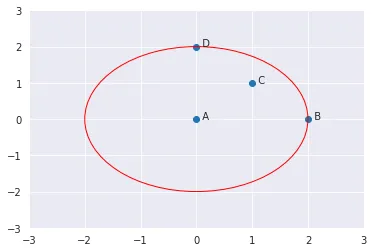

K-distance adalah jarak antara suatu titik, dan merupakan tetangga terdekat Kᵗʰ. Tetangga K yang dilambangkan dengan Nₖ(A) mencakup himpunan titik yang terletak di dalam atau pada lingkaran berjari-jari jarak K. K-tetangga bisa lebih dari atau sama dengan nilai K. Kita akan melihat contohnya. Katakanlah kita mempunyai empat titik A, B, C, dan D. Jika K=2, K-tetangga A adalah C, B, dan D. Di sini, nilai K=2 tetapi ||N₂(A)|| = 3. Oleh karena itu, ||Nₖ(titik)|| akan selalu lebih besar atau sama dengan K.

Reachability Distance (RD)


Ini didefinisikan sebagai jarak K maksimum Xj dan jarak antara Xi dan Xj. Ukuran jarak bersifat khusus untuk masalah (Euclidean, Manhattan, dll.) Dalam istilah awam, jika titik Xi terletak di dalam K-tetangga Xj, maka jarak jangkauannya adalah K-jarak Xj (garis biru), jika tidak, jarak jangkauannya adalah jarak antara Xi dan Xj (garis oranye).

Local reachability density (LRD)

$$
\text{LRD}_k(A) = \frac{1}{\frac{\sum_{B \in N_k(A)} \text{reach-dist}_k(A, B)}{|N_k(A)|}} = \frac{|N_k(A)|}{\sum_{B \in N_k(A)} \text{reach-dist}_k(A, B)}
$$

LRD merupakan kebalikan dari rata-rata jarak jangkauan A dari tetangganya. Semakin besar jarak jangkauan rata-rata (yaitu, tetangga jauh dari titik tersebut), semakin sedikit kepadatan titik yang ada di sekitar titik tertentu. Ini menunjukkan seberapa jauh suatu titik dari kelompok titik terdekat. Nilai LRD yang rendah menunjukkan bahwa cluster terdekat berada jauh dari titik.

Local Outlier Factor (LOF)

$$
\text{LOF}_k(A) = \frac{\sum_{B \in N_k(A)} \frac{\text{LRD}_k(B)}{\text{LRD}_k(A)}}{|N_k(A)|}
$$

LRD tiap titik digunakan untuk membandingkan dengan rata-rata LRD K tetangganya. LOF adalah perbandingan rata-rata LRD K tetangga A terhadap LRD A. Jika suatu titik bukan merupakan pencilan (inlier), rasio rata-rata LRD tetangganya kira-kira sama dengan LRD suatu titik (karena kepadatan suatu titik dan tetangganya kira-kira sama). Dalam hal ini, LOF hampir sama dengan 1. Sebaliknya, jika suatu titik merupakan outlier, LRD suatu titik lebih kecil dari rata-rata LRD tetangganya. Maka nilai LOF akan tinggi. Umumnya jika LOF > 1 maka dianggap outlier, namun hal tersebut tidak selalu benar. Katakanlah kita mengetahui bahwa kita hanya memiliki satu outlier dalam data, lalu kita ambil nilai LOF maksimum di antara semua nilai LOF, dan titik yang sesuai dengan nilai LOF maksimum akan dianggap sebagai outlier.

Untuk langkah-langkah perhitungan manual Local Outlier Factor (LOF) yaitu :

1. Menghitung jarak dan menentukan tetangga

2. Menghitung Reachability Distance (RD)

3. Menghitung Local Reachability Distance (LRD)

4. Menghitung Local Outlier Factor (LOF)

## Implementasi local outlier factor dengan scikit learn

dengan code di bawah ini

In [186]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# membuat model lof
features = ["Age","SystolicBP","DiastolicBP","BS","BodyTemp","HeartRate"]
X = data[features].values

print(f"Data fitur (X) siap untuk dianalisis dengan ukuran: {X.shape}")

Data fitur (X) siap untuk dianalisis dengan ukuran: (1014, 6)


In [187]:
# Inisialisasi model LOF
# Menggunakan n_neighbors=20 (default) dan contamination='auto'
# contamination='auto' adalah pendekatan yang baik jika Anda tidak yakin
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')

# Melakukan fitting model ke data dan memprediksi outlier
# Output: 1 untuk inlier, -1 untuk outlier
y_pred = lof.fit_predict(X)

print("Prediksi selesai. Berikut adalah beberapa hasil prediksi:")
print(y_pred[:20]) # Menampilkan 20 prediksi pertama



Prediksi selesai. Berikut adalah beberapa hasil prediksi:
[-1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1]


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(



Data yang terdeteksi sebagai Outlier:
      Age  SystolicBP  DiastolicBP     BS  BodyTemp  HeartRate  RiskLevel  \
0      25         130           80  15.00      98.0         86  high risk   
5      23         140           80   7.01      98.0         70  high risk   
6      23         130           70   7.01      98.0         78   mid risk   
73     54         130           70  12.00      98.0         67   mid risk   
75     23         130           70   6.90      98.0         70   mid risk   
...   ...         ...          ...    ...       ...        ...        ...   
961    40         160          100  19.00      98.0         77  high risk   
992    17         110           75  13.00     101.0         76  high risk   
994    40         160          100  19.00      98.0         77  high risk   
1009   22         120           60  15.00      98.0         80  high risk   
1011   35          85           60  19.00      98.0         86  high risk   

      is_outlier  
0             -1 

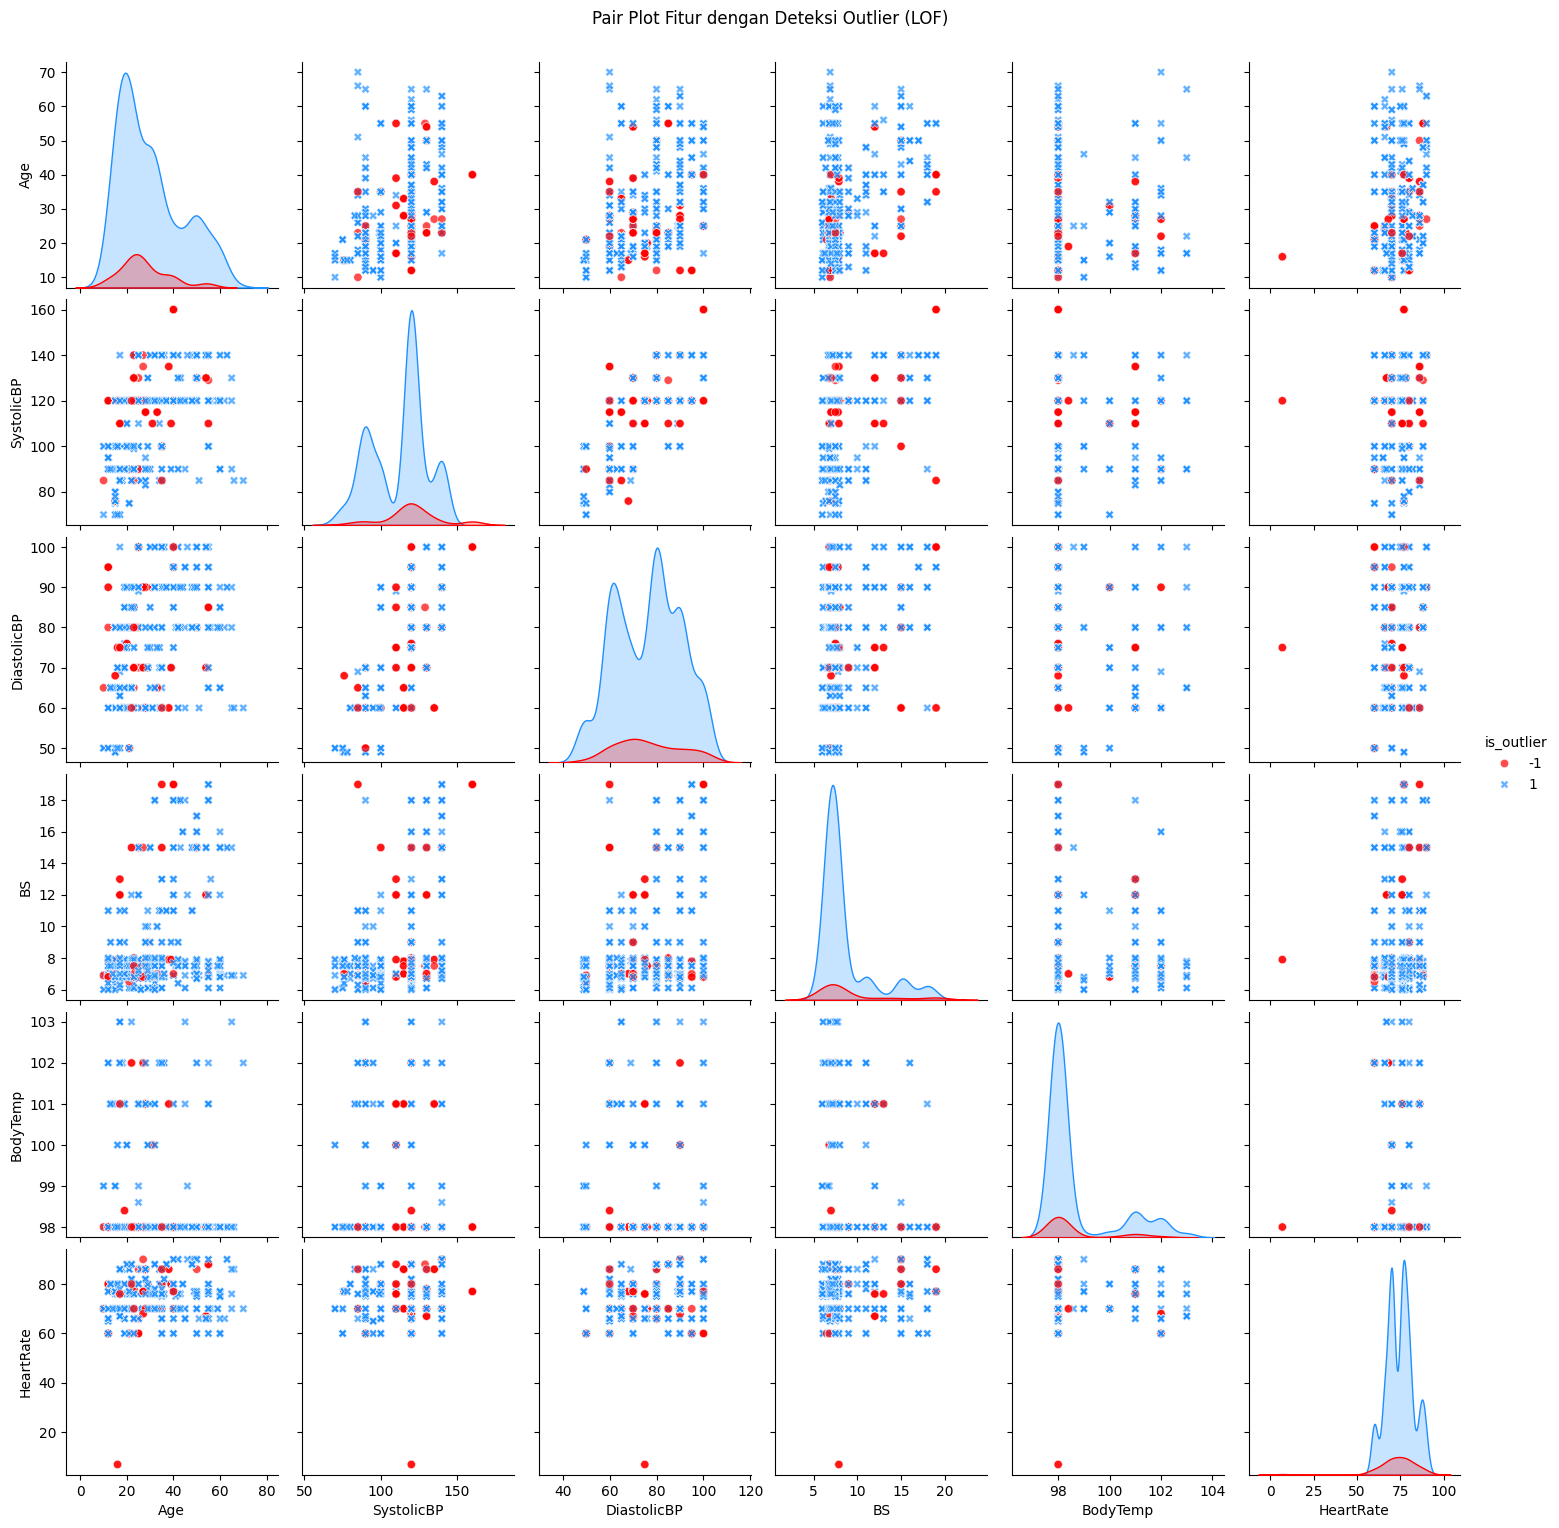

In [188]:
# Menambahkan hasil prediksi ke DataFrame asli
data['is_outlier'] = y_pred

# Menampilkan data yang terdeteksi sebagai outlier
print("\nData yang terdeteksi sebagai Outlier:")
outliers_df = data[data['is_outlier'] == -1]
print(outliers_df)

# --- VISUALISASI UNTUK DATA MULTIDIMENSI ---
# Karena kita memiliki lebih dari 2 fitur, scatter plot sederhana tidak cukup.
# Kita gunakan Pair Plot dari Seaborn untuk melihat sebaran data di setiap pasang fitur.
print("\nMembuat visualisasi Pair Plot untuk melihat hubungan antar fitur...")
print("Titik merah (X) menandakan outlier yang terdeteksi.")

# Membuat pair plot
pairplot = sns.pairplot(
    data,
    vars=features,       # Hanya plot kolom fitur
    hue='is_outlier',    # Warnai berdasarkan label outlier
    palette={1: 'dodgerblue', -1: 'red'}, # Tentukan warna
    markers=["o", "X"],  # Beri bentuk berbeda untuk inlier dan outlier
    plot_kws={'alpha': 0.7} # Atur transparansi titik
)
pairplot.fig.suptitle("Pair Plot Fitur dengan Deteksi Outlier (LOF)", y=1.02) # Tambah judul
plt.show()

In [189]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from ucimlrepo import fetch_ucirepo

# --- Step 1: Ambil dataset ---
dataset = fetch_ucirepo(id=863)
data = pd.concat([dataset.data.features, dataset.data.targets], axis=1)

# --- Step 2: Pisahkan fitur dan label ---
X = data[["Age", "SystolicBP", "DiastolicBP", "BS", "BodyTemp", "HeartRate"]]
y = data["RiskLevel"]

# --- Step 3: Deteksi outlier menggunakan Local Outlier Factor ---
lof = LocalOutlierFactor(n_neighbors=50)
y_outlier = lof.fit_predict(X)

# Tambahkan kolom outlier ke data asli
data["is_outlier"] = y_outlier

# --- Step 4: Hapus outlier ---
data_clean = data[data["is_outlier"] != -1].drop(columns="is_outlier")
X_clean = data_clean[["Age", "SystolicBP", "DiastolicBP", "BS", "BodyTemp", "HeartRate"]]
y_clean = data_clean["RiskLevel"]


# Preprocesing

## 🔄 Binning

Binning adalah proses mengelompokkan data numerik ke dalam beberapa kategori diskrit (seperti "rendah", "sedang", dan "tinggi").  
Langkah ini sangat penting saat kita ingin menggunakan algoritma seperti **Naive Bayes kategorikal**, karena algoritma tersebut bekerja dengan baik pada data kategorikal.

Pada dataset ini, fitur-fitur seperti:
- Age (Usia)
- SystolicBP (Tekanan Darah Sistolik)
- DiastolicBP (Tekanan Darah Diastolik)
- BS (Gula Darah)
- BodyTemp (Suhu Tubuh)
- HeartRate (Denyut Jantung)

... semuanya merupakan data numerik. Maka dari itu, dilakukan **binning** terhadap semua fitur tersebut menggunakan `KBinsDiscretizer` dari `sklearn`.

### 🔧 Teknik Binning yang Digunakan:
- **n_bins=3**: membagi nilai menjadi 3 kategori → "rendah" (0), "sedang" (1), dan "tinggi" (2).
- **encode='ordinal'**: hasilnya dalam bentuk angka (bukan one-hot).
- **strategy='quantile'**: membagi data berdasarkan distribusi kuantil, sehingga tiap kategori memiliki jumlah data yang relatif sama.

### 📌 Tujuan Binning:
- Menyederhanakan fitur numerik menjadi fitur kategori
- Membantu model Naive Bayes menangani data dengan asumsi non-Gaussian
- Meningkatkan performa model pada data medis yang sering memiliki sebaran ekstrem (outlier)

Setelah binning, kita bisa lanjut ke proses:
1. Encoding label target menjadi numerik
2. Melatih model menggunakan `CategoricalNB`
3. Evaluasi model klasifikasi


In [190]:
# --- Import Library ---
from sklearn.preprocessing import KBinsDiscretizer
import pandas as pd

# --- Asumsikan X_clean dan y_clean sudah tersedia (bersih dari outlier) ---

# Membuat objek KBinsDiscretizer
# Membagi setiap fitur menjadi 3 bin (low risk=0, mid risk=1, high risk=2)
kbins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

# Terapkan binning pada fitur numerik
X_binned = kbins.fit_transform(X_clean)

# Ubah hasil binning ke dalam DataFrame
X_binned_df = pd.DataFrame(X_binned, columns=X_clean.columns)

# Tambahkan kolom label (masih dalam bentuk string/kategori)
X_binned_df['RiskLevel'] = y_clean.values

# --- Tampilkan hasil binning awal ---
print("Hasil Binning (0=low risk, 1=mid risk, 2=high risk):")
print(X_binned_df.head())


Hasil Binning (0=low risk, 1=mid risk, 2=high risk):
   Age  SystolicBP  DiastolicBP   BS  BodyTemp  HeartRate  RiskLevel
0  1.0         2.0          2.0  2.0       0.0        2.0  high risk
1  2.0         2.0          2.0  2.0       0.0        1.0  high risk
2  1.0         0.0          1.0  2.0       0.0        2.0  high risk
3  1.0         2.0          2.0  1.0       0.0        1.0  high risk
4  2.0         2.0          0.0  0.0       0.0        1.0   low risk


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(


# Modelling

## Modelling Klasifikasi Gaussian Naive Bayes

Modeling merupakan proses pembuatan dan pengujian model statistik atau matematis yang digunakan untuk menggambarkan dan menganalisis pola atau hubungan dalam data. Tujuan utama dari pemodelan dalam data mining adalah untuk mengidentifikasi pola yang berguna atau prediksi yang akurat dari data yang tersedia.

Untuk pemodelan kali ini, tujuannya adalah untuk menentukan kelas pada suatu data inputan. Pada konteks resiko kematian ibu, kelas ini adalah low risk atau mid risk. Data akan dibagi menjadi dua tipe, yaitu data latih (train data) dan data uji (test data). Metode yang digunakan adalah Gaussian Naive Bayes (GNB).

Langkah-langkah Kalkulasi Gaussian Naive Bayes
Perhitungan GNB untuk menentukan kelas dari sebuah data baru dapat diuraikan melalui tahap-tahap berikut:

1. Pembagian Dataset (Train-Test Split)
Langkah pertama adalah membagi dataset menjadi data latih dan data uji. Rasio pembagian yang sering digunakan adalah 80% data latih dan 20% data uji, atau 70% data latih dan 30% data uji. Untuk contoh ini, kita akan menggunakan rasio 80% data latih dan 20% data uji.

2. Menghitung Probabilitas Prior
Probabilitas Prior $P(C_k)$ adalah probabilitas awal dari setiap kelas, dihitung berdasarkan proporsi data pada data latih.

$$
P(C_k) = \frac{\text{Jumlah data di kelas } C_k}{\text{Total jumlah data latih}}
$$

Penjelasan Rumus:

$C_k$ adalah kelas ke-k (misalnya, low risk atau high risk).

$P(C_k)$ adalah probabilitas prior untuk kelas $C_k$.
3. Menghitung Mean dan Standar Deviasi
Selanjutnya, kita menghitung nilai rata-rata (mean) dan standar deviasi untuk setiap fitur, yang dipisahkan berdasarkan kelasnya pada data latih. Nilai-nilai ini akan digunakan dalam perhitungan distribusi Gaussian.

4. Menghitung Probabilitas Likelihood dengan Distribusi Gaussian
Karena kita menggunakan Gaussian Naive Bayes, kita mengasumsikan bahwa fitur-fitur numerik pada setiap kelas terdistribusi secara normal (Gaussian). Kita menghitung probabilitas likelihood dari sebuah nilai fitur $x_i$ jika diketahui kelasnya adalah $C_k$, yaitu $P(x_i | C_k)$.

$$
P(x_i | C_k) = \frac{1}{\sqrt{2\pi\sigma_{k,i}^2}} \exp\left(-\frac{(x_i - \mu_{k,i})^2}{2\sigma_{k,i}^2}\right)
$$

Tentu, berikut adalah penyesuaian dari penjelasan Anda menjadi format yang cocok untuk sel teks di Google Colab, lengkap dengan rumus-rumus yang relevan dalam format LaTeX.

Pemodelan dengan Gaussian Naive Bayes (GNB)
Modeling merupakan proses pembuatan dan pengujian model statistik atau matematis yang digunakan untuk menggambarkan dan menganalisis pola atau hubungan dalam data. Tujuan utama dari pemodelan dalam data mining adalah untuk mengidentifikasi pola yang berguna atau prediksi yang akurat dari data yang tersedia.

Untuk pemodelan kali ini, tujuannya adalah untuk menentukan kelas pada suatu data inputan. Pada konteks kanker payudara, kelas ini adalah jinak atau ganas. Data akan dibagi menjadi dua tipe, yaitu data latih (train data) dan data uji (test data). Metode yang digunakan adalah Gaussian Naive Bayes (GNB).

Langkah-langkah Kalkulasi Gaussian Naive Bayes
Perhitungan GNB untuk menentukan kelas dari sebuah data baru dapat diuraikan melalui tahap-tahap berikut:

1. Pembagian Dataset (Train-Test Split)
Langkah pertama adalah membagi dataset menjadi data latih dan data uji. Rasio pembagian yang sering digunakan adalah 80% data latih dan 20% data uji, atau 70% data latih dan 30% data uji. Untuk contoh ini, kita akan menggunakan rasio 80% data latih dan 20% data uji.

2. Menghitung Probabilitas Prior
Probabilitas Prior $P(C_k)$ adalah probabilitas awal dari setiap kelas, dihitung berdasarkan proporsi data pada data latih.

Rumus LaTeX:

Cuplikan kode

$$
P(C_k) = \frac{\text{Jumlah data di kelas } C_k}{\text{Total jumlah data latih}}
$$
Penjelasan Rumus:

$C_k$ adalah kelas ke-k (misalnya, jinak atau ganas).
$P(C_k)$ adalah probabilitas prior untuk kelas $C_k$.
3. Menghitung Mean dan Standar Deviasi
Selanjutnya, kita menghitung nilai rata-rata (mean) dan standar deviasi untuk setiap fitur, yang dipisahkan berdasarkan kelasnya pada data latih. Nilai-nilai ini akan digunakan dalam perhitungan distribusi Gaussian.

4. Menghitung Probabilitas Likelihood dengan Distribusi Gaussian
Karena kita menggunakan Gaussian Naive Bayes, kita mengasumsikan bahwa fitur-fitur numerik pada setiap kelas terdistribusi secara normal (Gaussian). Kita menghitung probabilitas likelihood dari sebuah nilai fitur $x_i$ jika diketahui kelasnya adalah $C_k$, yaitu $P(x_i | C_k)$.

Rumus LaTeX:

Cuplikan kode

$$
P(x_i | C_k) = \frac{1}{\sqrt{2\pi\sigma_{k,i}^2}} \exp\left(-\frac{(x_i - \mu_{k,i})^2}{2\sigma_{k,i}^2}\right)
$$
Penjelasan Rumus:

$x_i$ adalah nilai dari fitur ke-i pada data baru yang ingin diprediksi.
$\mu_{k,i}$ (mu) adalah mean (rata-rata) dari fitur ke-i untuk kelas $C_k$.
$\sigma_{k,i}^2$ (sigma kuadrat) adalah varians dari fitur ke-i untuk kelas $C_k$. Standar deviasi adalah akar dari varians ($\sigma$).
$\pi$ (pi) adalah konstanta matematika (~3.14159).
$\exp$ adalah fungsi eksponensial.
5. Menghitung Probabilitas Posterior
Setelah mendapatkan probabilitas likelihood untuk setiap fitur, kita dapat menghitung probabilitas posterior untuk setiap kelas. Probabilitas ini adalah probabilitas data baru tersebut termasuk dalam kelas tertentu, setelah melihat data fiturnya. Berdasarkan asumsi "naive" bahwa setiap fitur independen, kita mengalikan semua probabilitas likelihood dengan probabilitas prior.

$$
P(C_k | \mathbf{X}) \propto P(C_k) \prod_{i=1}^{n} P(x_i | C_k)
$$

Penjelasan Rumus:

$P(C_k | \mathbf{X})$ adalah probabilitas posterior dari kelas $C_k$ diberikan data fitur $\mathbf{X} = (x_1, x_2, ..., x_n)$.

$\propto$ berarti "sebanding dengan" (proportional to). Kita bisa mengabaikan pembagi $P(\mathbf{X})$ karena nilainya sama untuk semua kelas.

$P(C_k)$ adalah probabilitas prior dari kelas $C_k$.

$\prod_{i=1}^{n}$ adalah simbol produk, yang berarti mengalikan hasil $P(x_i | C_k)$ untuk semua fitur dari i=1 sampai n.

6. Menentukan Kelas dengan Maximum A Posteriori (MAP)
Langkah terakhir adalah memilih kelas yang memiliki nilai probabilitas posterior tertinggi. Kelas inilah yang akan menjadi hasil prediksi untuk data baru tersebut.

Rumus LaTeX:

Cuplikan kode

$$
\hat{y} = \underset{k}{\operatorname{argmax}} \, P(C_k) \prod_{i=1}^{n} P(x_i | C_k)
$$
Penjelasan Rumus:

$\hat{y}$ adalah kelas yang diprediksi.
$\underset{k}{\operatorname{argmax}}$ berarti "temukan nilai k (kelas) yang memaksimalkan ekspresi setelahnya".

In [191]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# --- Asumsi: X_binned_df adalah hasil binning, dan kolom 'RiskLevel' adalah target ---

# Step 1: Pisahkan fitur dan label
X_ready = X_binned_df.drop(columns="RiskLevel")
y_ready = X_binned_df["RiskLevel"]

# Step 2: Encode label (RiskLevel) menjadi angka
label_enc = LabelEncoder()
y_encoded = label_enc.fit_transform(y_ready)

# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(X_ready, y_encoded, test_size=0.2, random_state=42)

# Step 4: Train model Naive Bayes
model = CategoricalNB()
model.fit(X_train, y_train)

# Step 5: Prediksi dan evaluasi
y_pred = model.predict(X_test)



In [192]:
# Step 6: Evaluasi performa
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

# Step 7: Tampilkan hasil
print(f"Akurasi: {accuracy:.2f}")
print(f"Presisi (macro avg): {precision:.2f}")
print(f"Recall (macro avg): {recall:.2f}")
print(f"F1-Score (macro avg): {f1:.2f}")
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=label_enc.classes_))

Akurasi: 0.57
Presisi (macro avg): 0.59
Recall (macro avg): 0.59
F1-Score (macro avg): 0.57

=== Classification Report ===
              precision    recall  f1-score   support

   high risk       0.55      0.72      0.62        46
    low risk       0.54      0.68      0.60        73
    mid risk       0.67      0.38      0.48        77

    accuracy                           0.57       196
   macro avg       0.59      0.59      0.57       196
weighted avg       0.59      0.57      0.56       196



### Menggembalikan setiap fiturnya tanpa menggunakan binning

In [193]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.neighbors import LocalOutlierFactor
from ucimlrepo import fetch_ucirepo

# --- Ambil dan siapkan data ---
dataset = fetch_ucirepo(id=863)
data = pd.concat([dataset.data.features, dataset.data.targets], axis=1)

# --- Deteksi & hapus outlier ---
X = data[["Age", "SystolicBP", "DiastolicBP", "BS", "BodyTemp", "HeartRate"]]
y = data["RiskLevel"]

lof = LocalOutlierFactor(n_neighbors=50)
outlier_flag = lof.fit_predict(X)
data["is_outlier"] = outlier_flag

# Bersihkan data
data_clean = data[data["is_outlier"] != -1].drop(columns="is_outlier")
X_clean = data_clean[["Age", "SystolicBP", "DiastolicBP", "BS", "BodyTemp", "HeartRate"]]
y_clean = data_clean["RiskLevel"]

# --- Ganti label kelas ke numerik ---
label_enc = LabelEncoder()
y_encoded = label_enc.fit_transform(y_clean)  # Hasil: array numerik

# Tampilkan mapping label
label_mapping = dict(zip(label_enc.classes_, label_enc.transform(label_enc.classes_)))
print("Mapping Kelas RiskLevel ke Numerik:", label_mapping)

# --- Encode fitur kategorikal (ordinal) ---
ord_enc = OrdinalEncoder()
X_encoded = ord_enc.fit_transform(X_clean)

# --- Split data ---
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# --- Latih model dengan CategoricalNB ---
cnb = CategoricalNB()
cnb.fit(X_train, y_train)
y_pred = cnb.predict(X_test)



Mapping Kelas RiskLevel ke Numerik: {'high risk': np.int64(0), 'low risk': np.int64(1), 'mid risk': np.int64(2)}


In [194]:
# --- Evaluasi ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"\nAkurasi: {accuracy:.2f}")
print(f"Presisi (macro avg): {precision:.2f}")
print(f"Recall (macro avg): {recall:.2f}")
print(f"F1-Score (macro avg): {f1:.2f}")
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=label_enc.classes_))



Akurasi: 0.72
Presisi (macro avg): 0.74
Recall (macro avg): 0.73
F1-Score (macro avg): 0.73

=== Classification Report ===
              precision    recall  f1-score   support

   high risk       0.83      0.76      0.80        46
    low risk       0.67      0.77      0.72        73
    mid risk       0.72      0.66      0.69        77

    accuracy                           0.72       196
   macro avg       0.74      0.73      0.73       196
weighted avg       0.73      0.72      0.72       196



uji coba model

In [195]:
# Pilih satu baris dari data yang sudah dibersihkan
index = 100  # ganti dengan indeks lain jika perlu

# Ambil fitur dan label aslinya
real_input = X_clean.iloc[index]
true_label = y_clean.iloc[index]

# Tampilkan data asli
print("=== Data Asli dari Dataset ===")
print(real_input)
print("Label Asli (RiskLevel):", true_label)



=== Data Asli dari Dataset ===
Age             25.0
SystolicBP     140.0
DiastolicBP    100.0
BS               6.8
BodyTemp        98.0
HeartRate       80.0
Name: 103, dtype: float64
Label Asli (RiskLevel): high risk


In [196]:
# === Uji Coba Prediksi Manual ===
import numpy as np
import pandas as pd

# Input baru (manual): pastikan urutannya sesuai
input_manual = [[25, 140, 100, 6.8, 98.0, 80]]  # Contoh: umur 25, SBP 120, DBP 80, BS 6.5, suhu 98.0, HR 75

# Buat DataFrame agar bisa di-encode dengan OrdinalEncoder
input_df = pd.DataFrame(input_manual, columns=["Age", "SystolicBP", "DiastolicBP", "BS", "BodyTemp", "HeartRate"])

# Encode menggunakan encoder yang sudah dilatih sebelumnya
input_encoded = ord_enc.transform(input_df)

# Prediksi kelas dengan model
predicted_class = cnb.predict(input_encoded)

# Konversi ke label asli
predicted_label = label_enc.inverse_transform(predicted_class)

# Tampilkan hasil
print("\n=== Hasil Prediksi Inputan Manual ===")
print("Input:", input_manual[0])
print("Class Index (Encoded):", predicted_class[0])
print("Predicted Risk Level:", predicted_label[0])



=== Hasil Prediksi Inputan Manual ===
Input: [25, 140, 100, 6.8, 98.0, 80]
Class Index (Encoded): 0
Predicted Risk Level: high risk


## Modeling dengan menggunakan decision tree

Dalam bagian ini, kita akan melakukan modeling menggunakan algoritma **Decision Tree Classifier** pada dataset risiko kesehatan ibu yang telah dibersihkan dari outlier dan labelnya dikonversi menjadi numerik.

### 📌 Apa itu Decision Tree?

Decision Tree adalah model prediksi berbentuk struktur pohon, di mana setiap **node internal** merepresentasikan sebuah kondisi (pengujian pada fitur), setiap **cabang** menunjukkan hasil pengujian, dan setiap **daun** mewakili label kelas akhir.

---

### 📐 Pemilihan Fitur

Model ini menggunakan 6 fitur numerik:
- `Age` (Usia)
- `SystolicBP` (Tekanan darah sistolik)
- `DiastolicBP` (Tekanan darah diastolik)
- `BS` (Gula darah)
- `BodyTemp` (Suhu tubuh)
- `HeartRate` (Denyut jantung)

---

### ⚙️ Algoritma dan Rumus

Untuk menentukan pemisahan terbaik di setiap node, digunakan metrik **entropy** dan **information gain**.

#### 🔹 Entropy

Entropy digunakan untuk mengukur ketidakteraturan (impurity) dari suatu himpunan data. Didefinisikan sebagai:

$$
Entropy(S) = - \sum_{i=1}^{c} p_i \log_2(p_i)
$$

di mana:
- ( p_i \) adalah proporsi data untuk kelas ke-i
- \( c \) adalah jumlah total kelas

#### 🔹 Information Gain

Information gain digunakan untuk memilih fitur terbaik yang akan digunakan pada node. Rumusnya:

$$
IG(S, A) = Entropy(S) - \sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} Entropy(S_v)
$$

di mana:
- \( S \) adalah dataset induk
- \( A \) adalah atribut/faktor yang sedang diuji
- \( S_v \) adalah subset data dengan nilai atribut \( A = v \)

---

### 🧪 Evaluasi Model

Model akan dievaluasi menggunakan metrik berikut:

- **Accuracy**: Proporsi prediksi yang benar terhadap total data.
$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

- **Precision (macro average)**: Rata-rata presisi dari setiap kelas.
- **Recall (macro average)**: Rata-rata sensitivitas dari setiap kelas.
- **F1-Score (macro average)**: Harmonik dari precision dan recall.

---

In [197]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# === Gunakan data bersih: X_clean dan y_clean ===

# Step 1: Encode label target (RiskLevel → numerik)
label_enc = LabelEncoder()
y_encoded = label_enc.fit_transform(y_clean)

# Step 2: Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_encoded, test_size=0.2, random_state=42)

# Step 3: Inisialisasi dan latih model Decision Tree
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Step 4: Prediksi
y_pred = dt_model.predict(X_test)

# Step 5: Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Step 6: Tampilkan hasil
print(f"Akurasi: {accuracy:.2f}")
print(f"Presisi (macro avg): {precision:.2f}")
print(f"Recall (macro avg): {recall:.2f}")
print(f"F1-Score (macro avg): {f1:.2f}")
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=label_enc.classes_))


Akurasi: 0.65
Presisi (macro avg): 0.74
Recall (macro avg): 0.67
F1-Score (macro avg): 0.65

=== Classification Report ===
              precision    recall  f1-score   support

   high risk       0.87      0.74      0.80        46
    low risk       0.55      0.95      0.70        73
    mid risk       0.78      0.32      0.46        77

    accuracy                           0.65       196
   macro avg       0.74      0.67      0.65       196
weighted avg       0.72      0.65      0.63       196



### Menggembalikan setiap fiturnya tanpa menggunakan binning

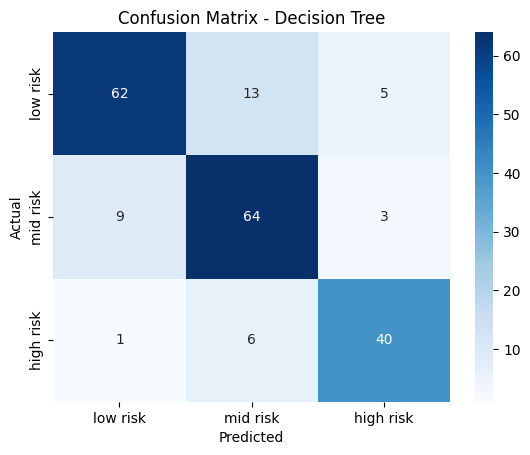

In [201]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import matplotlib.pyplot as plt

# --- Ambil dataset ---
data = fetch_ucirepo(id=863)
df = pd.concat([data.data.features, data.data.targets], axis=1)

# --- Pisahkan fitur dan target ---
X = df[["Age", "SystolicBP", "DiastolicBP", "BS", "BodyTemp", "HeartRate"]]
y = df["RiskLevel"]

# --- Split data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Buat dan latih model Decision Tree ---
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# --- Prediksi ---
y_pred = dt_model.predict(X_test)



# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred, labels=["low risk", "mid risk", "high risk"])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["low risk", "mid risk", "high risk"],
            yticklabels=["low risk", "mid risk", "high risk"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


In [202]:
# --- Evaluasi ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
fscore = f1_score(y_test, y_pred, average='macro')

print(f"Akurasi: {accuracy:.2f}")
print(f"Presisi (macro avg): {precision:.2f}")
print(f"Recall (macro avg): {recall:.2f}")
print(f"F1-Score (macro avg): {fscore:.2f}")

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

Akurasi: 0.82
Presisi (macro avg): 0.82
Recall (macro avg): 0.82
F1-Score (macro avg): 0.82

=== Classification Report ===
              precision    recall  f1-score   support

   high risk       0.83      0.85      0.84        47
    low risk       0.86      0.78      0.82        80
    mid risk       0.77      0.84      0.81        76

    accuracy                           0.82       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.82      0.82       203



uji coba dengan inputan menggunakan decision tree

In [200]:
# --- Uji Coba Prediksi dengan Inputan Manual ---

# Input data baru: [Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate]
input_data = [[27, 120, 80, 6.8, 98.5, 76]]  # Contoh: wanita 27 tahun dengan kondisi vital tertentu

# Konversi ke DataFrame agar sesuai dengan format pelatihan
input_df = pd.DataFrame(input_data, columns=["Age", "SystolicBP", "DiastolicBP", "BS", "BodyTemp", "HeartRate"])

# Prediksi menggunakan model Decision Tree
predicted_class = dt_model.predict(input_df)

# Tampilkan hasil
print("=== Hasil Prediksi Data Baru ===")
print("Input Data:", input_data[0])
print("Predicted Risk Level:", predicted_class[0])


=== Hasil Prediksi Data Baru ===
Input Data: [27, 120, 80, 6.8, 98.5, 76]
Predicted Risk Level: low risk


# Kesimpulan

Dari Modeling di atas dengan menggunakan naive bayes dan decision tree saya mencoba menggunakan binning untuk setiap fiturnya dan tidak menggunakannya pada dua metode tersebut hasilnya menunjukkan modeling menggunakan decision tree dengan fitur asli dari data tanpa binning menghasilkan akurasi lebih tinggi diantara model model lainnya

Binning tidak disarankan untuk data ini, karena seluruh fitur pada dataset ini sudah bersifat numerik kontinu dan informatif secara langsung. Diskretisasi justru menghilangkan informasi penting.

| Model         | Binning | Akurasi | Presisi (Macro Avg) | Recall (Macro Avg) | F1-Score (Macro Avg) |
| ------------- | ------- | ------- | ------------------- | ------------------ | -------------------- |
| Naive Bayes   | ✔️      | 0.57    | 0.59                | 0.59               | 0.57                 |
| Naive Bayes   | ❌       | 0.72    | 0.74                | 0.73               | 0.73                 |
| Decision Tree | ✔️      | 0.65    | 0.74                | 0.67               | 0.65                 |
| Decision Tree | ❌       | 0.82    | 0.82                | 0.82               | 0.82                 |
